In [1]:
import tensorflow as tf
import os

In [2]:
import cv2
import imghdr

In [3]:
data_dir= '/content/drive/MyDrive/data'

In [4]:
image_exts = ['jpeg','jpg','bmp','png']


In [5]:
happy_images = os.listdir(os.path.join(data_dir,'happy'))
sad_images = os.listdir(os.path.join(data_dir,'sad'))

In [17]:
for image_class in os.listdir(data_dir):
    for image in os.listdir(os.path.join(data_dir, image_class)):
        image_path = os.path.join(data_dir, image_class, image)
        try:
            img = cv2.imread(image_path)
            tip = imghdr.what(image_path)
            if tip not in image_exts:
                print('Image not in ext list {}'.format(image_path))
                os.remove(image_path)
        except Exception as e:
            print('Issue with image {}'.format(image_path))
            # os.remove(image_path)


In [7]:
import numpy as np
import matplotlib.pyplot as plt

In [20]:
data = tf.keras.utils.image_dataset_from_directory(data_dir)

Found 305 files belonging to 2 classes.


In [ ]:
for d in data:
  print(d)

In [23]:
data_iterator = data.as_numpy_iterator()

In [24]:
batch = data_iterator.next()

In [25]:
batch[0].shape

(32, 256, 256, 3)

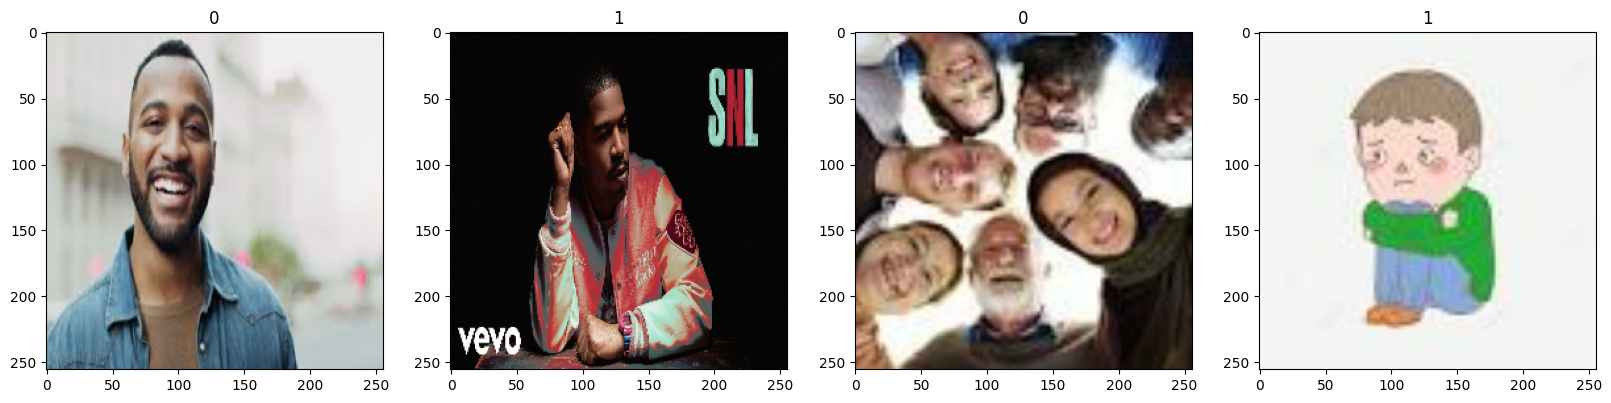

In [26]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

In [29]:
data = data.map(lambda x,y: (x/255, y))

In [30]:
data.as_numpy_iterator().next()

(array([[[[3.9061899e-03, 3.9061899e-03, 3.9061899e-03],
          [3.9061899e-03, 3.9061899e-03, 3.9061899e-03],
          [3.9061899e-03, 3.9061899e-03, 3.9061899e-03],
          ...,
          [3.9061899e-03, 3.9061899e-03, 3.9061899e-03],
          [3.9061899e-03, 3.9061899e-03, 3.9061899e-03],
          [3.9061899e-03, 3.9061899e-03, 3.9061899e-03]],
 
         [[3.9061899e-03, 3.9061899e-03, 3.9061899e-03],
          [3.9061899e-03, 3.9061899e-03, 3.9061899e-03],
          [3.9061899e-03, 3.9061899e-03, 3.9061899e-03],
          ...,
          [3.9061899e-03, 3.9061899e-03, 3.9061899e-03],
          [3.9061899e-03, 3.9061899e-03, 3.9061899e-03],
          [3.9061899e-03, 3.9061899e-03, 3.9061899e-03]],
 
         [[3.9061899e-03, 3.9061899e-03, 3.9061899e-03],
          [3.9061899e-03, 3.9061899e-03, 3.9061899e-03],
          [3.9061899e-03, 3.9061899e-03, 3.9061899e-03],
          ...,
          [3.9061899e-03, 3.9061899e-03, 3.9061899e-03],
          [3.9061899e-03, 3.9061899e-

In [31]:
train_size = int(len(data)*.7)
val_size = int(len(data)*.2)
test_size = int(len(data)*.1)

In [32]:

train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size+val_size).take(test_size)


In [34]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,Dense,MaxPooling2D,Dense,Flatten,Dropout

In [35]:
model = Sequential()

In [36]:
model.add(Conv2D(16, (3,3), 1, activation='relu', input_shape=(256,256,3)))
model.add(MaxPooling2D())
model.add(Conv2D(32, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Conv2D(16, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [37]:
model.compile('adam', loss=tf.losses.BinaryCrossentropy(), metrics=['accuracy'])